In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [3]:
X_train = pd.read_csv("Bases/base_xtrain.csv")
X_test = pd.read_csv("Bases/base_xtest.csv")
y_train = pd.read_csv("Bases/base_ytrain.csv")
y_test = pd.read_csv("Bases/base_ytest.csv")

In [4]:
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop(columns=['Unnamed: 0'], inplace=True)
y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_test.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
X_train.columns

Index(['SEXO', 'FAMILIA_MNT_RUIM', 'SALARIO', 'HORAS', 'ESCOLARIDADE',
       'MORADIA', 'DOENCA_MENTAL', 'ATV_FISICA', 'ALCOOL',
       'NAO_TRAB_MTV_SAUDE', 'TRABALHA', 'FUMA', 'IMC',
       'PENSAMENTOS_NEGATIVOS', 'ESTADO_SAUDE', 'ALIMENTOS_SAUDAVEIS',
       'CARNES', 'ALIMENTOS_PREJUDICIAIS', 'PROCURA_MEDICA'],
      dtype='object')

### INICIANDO MODELAGEM

In [6]:
#testando modelo antes do balanceamento
#Iremos comparar o precision e o recall antes e depois do balanceamento, para sabermos se deu certo
#importando modelo}
from sklearn.tree import DecisionTreeClassifier
#defininfo classificador
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf= 4, min_samples_split= 2 )
#Fazendo Fit com os dados
clf = clf.fit(X_train, y_train)

In [7]:
y_pred_treino = clf.predict(X_train)

In [8]:
#prev do resultado
y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_bf = accuracy_score(y_test, y_pred)

print("Acurácia do modelo de Arvore de decisão:", accuracy_bf)

Acurácia do modelo de Arvore de decisão: 0.8303318494536625


In [10]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.2275607180570222

In [11]:
from sklearn.metrics import recall_score
#verificando recall
recall_score(y_test,y_pred)

0.6682170542635659

In [12]:
from sklearn.metrics import confusion_matrix
#gerando matriz de confusão
confusion_matrix(y_test,y_pred)

array([[ 431,  214],
       [1463, 7776]], dtype=int64)

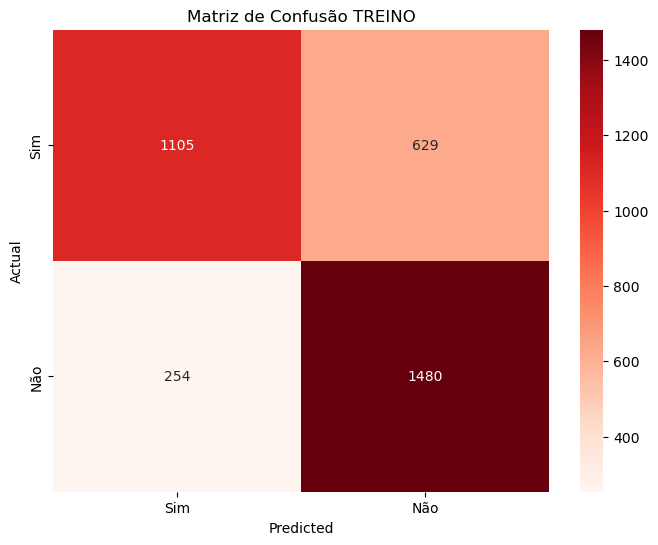

In [13]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_treino)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

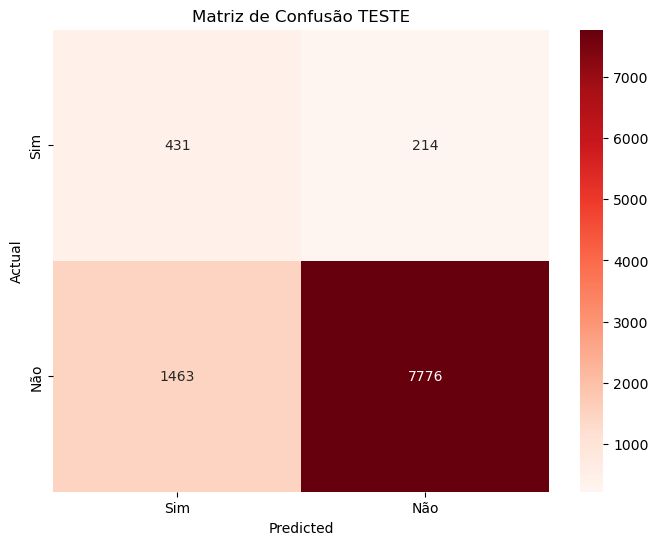

In [14]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.23      0.67      0.34       645
         2.0       0.97      0.84      0.90      9239

    accuracy                           0.83      9884
   macro avg       0.60      0.75      0.62      9884
weighted avg       0.92      0.83      0.87      9884



In [16]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_pred_treino))

              precision    recall  f1-score   support

         1.0       0.81      0.64      0.71      1734
         2.0       0.70      0.85      0.77      1734

    accuracy                           0.75      3468
   macro avg       0.76      0.75      0.74      3468
weighted avg       0.76      0.75      0.74      3468



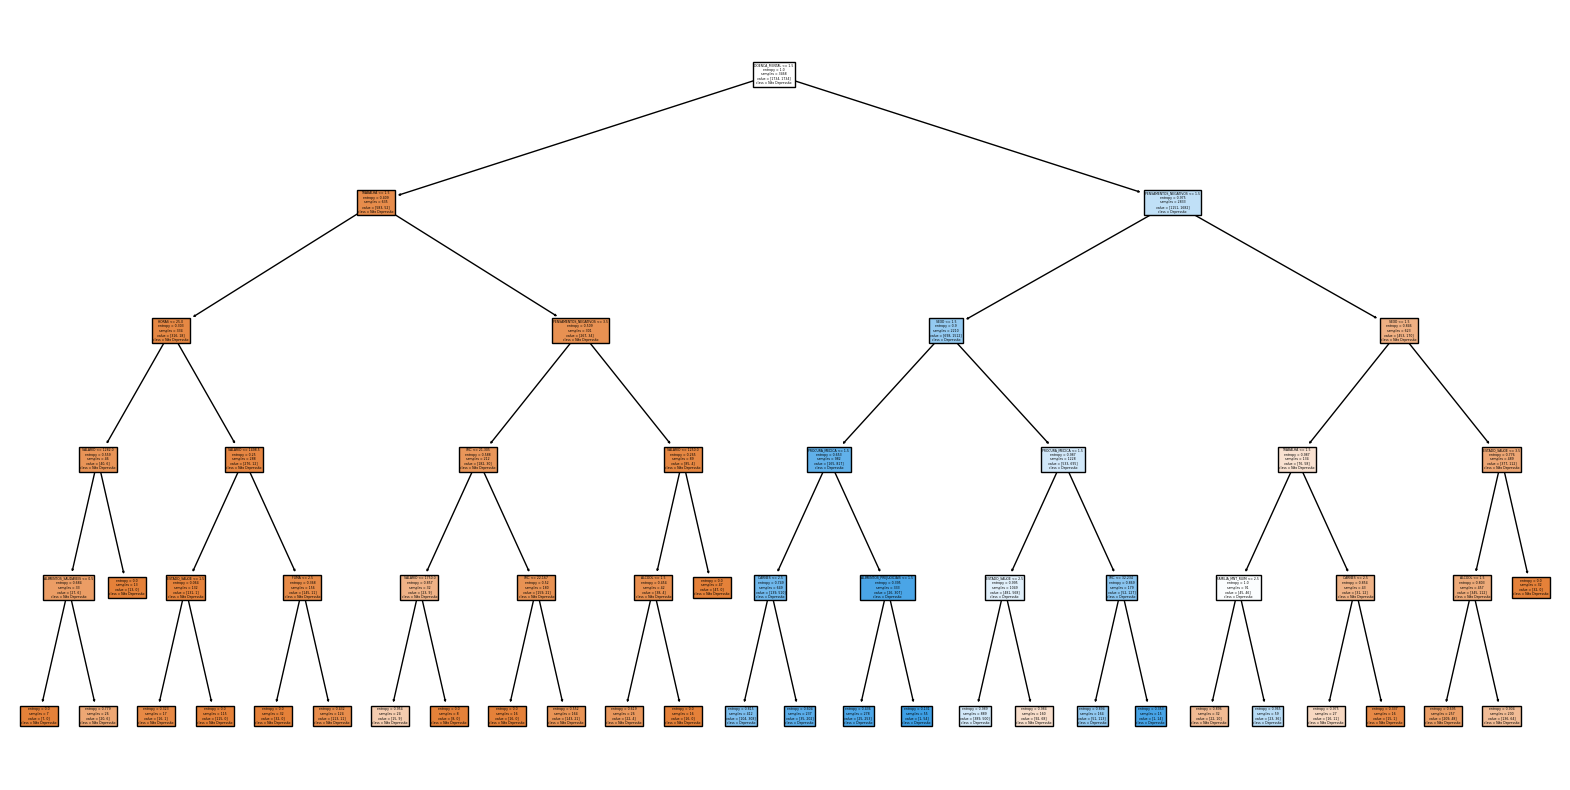

In [17]:
from sklearn.tree import plot_tree

# Convertendo os nomes das colunas para uma lista de strings
feature_names = list(X_test.columns)

# Plotando a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=feature_names, class_names=['Não Depressão', 'Depressão'], filled=True)
plt.show()

### RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [19]:
X_train.shape

(3468, 19)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features=1,min_samples_leaf=4, min_samples_split=10, max_depth=10)
rf = rf.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [21]:
y_predRF = rf.predict(X_test)

In [22]:
y_pred_treino_RF = rf.predict(X_train)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_bf = accuracy_score(y_test, y_predRF)

print("Acurácia do modelo de Random Forest:", accuracy_bf)

Acurácia do modelo de Random Forest: 0.7811614730878187


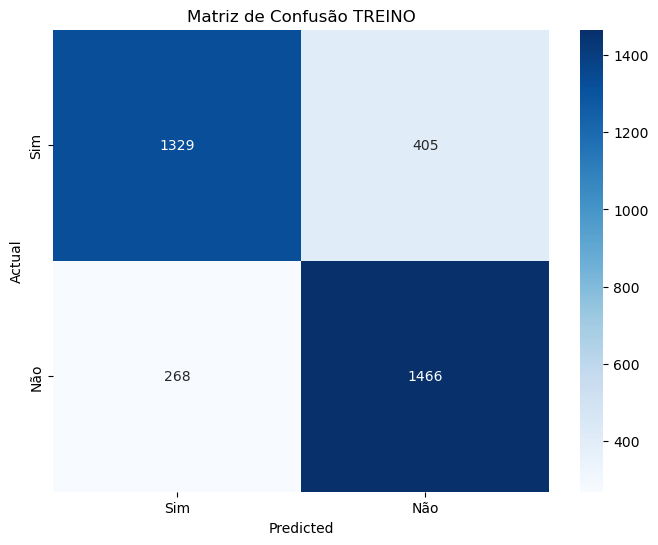

In [24]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_treino_RF)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

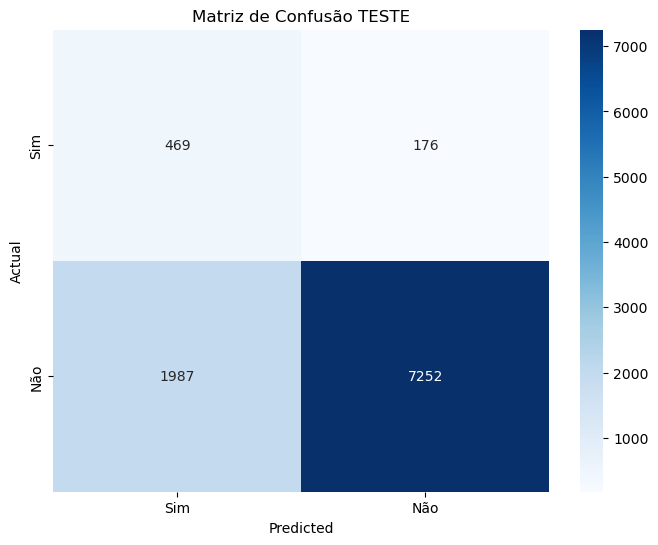

In [25]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_predRF)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [26]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

         1.0       0.19      0.73      0.30       645
         2.0       0.98      0.78      0.87      9239

    accuracy                           0.78      9884
   macro avg       0.58      0.76      0.59      9884
weighted avg       0.93      0.78      0.83      9884



In [27]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_pred_treino_RF))

              precision    recall  f1-score   support

         1.0       0.83      0.77      0.80      1734
         2.0       0.78      0.85      0.81      1734

    accuracy                           0.81      3468
   macro avg       0.81      0.81      0.81      3468
weighted avg       0.81      0.81      0.81      3468



### NAIVE

In [28]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()

In [29]:
modelo.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [30]:
previsoes = modelo.predict(X_test)

In [31]:
y_pred_treino_NB = modelo.predict(X_train)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.8445973290165925

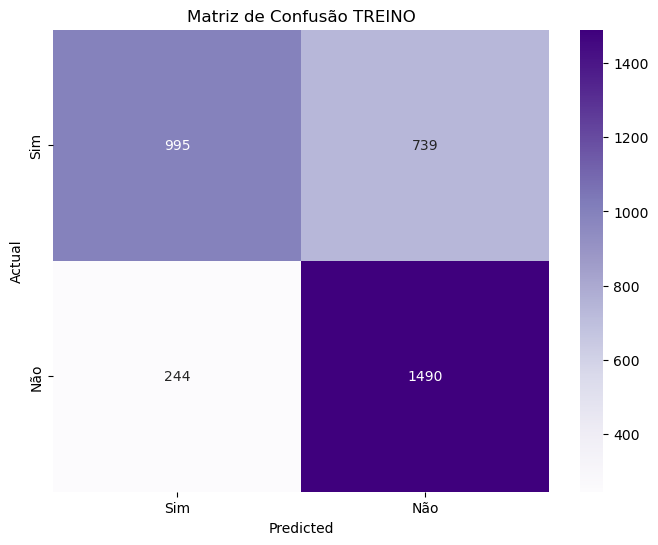

In [33]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_treino_NB)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

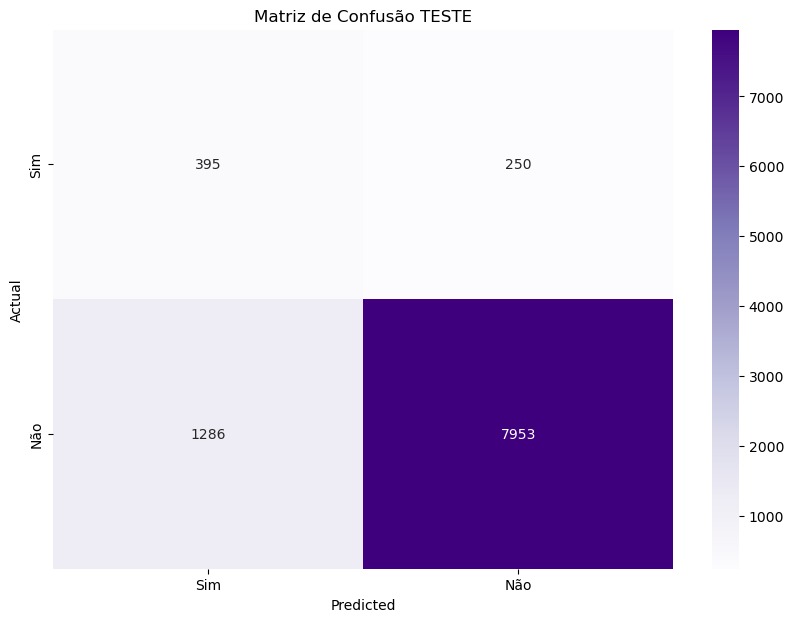

In [34]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, previsoes)

# Plotando a matriz de confusão com a cor roxa
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [35]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         1.0       0.23      0.61      0.34       645
         2.0       0.97      0.86      0.91      9239

    accuracy                           0.84      9884
   macro avg       0.60      0.74      0.63      9884
weighted avg       0.92      0.84      0.87      9884



In [36]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_pred_treino_NB))

              precision    recall  f1-score   support

         1.0       0.80      0.57      0.67      1734
         2.0       0.67      0.86      0.75      1734

    accuracy                           0.72      3468
   macro avg       0.74      0.72      0.71      3468
weighted avg       0.74      0.72      0.71      3468



## TESTANDO OUTROS MODELOS

#### REDE NEURAL

In [37]:
from sklearn.neural_network import MLPClassifier

rede_neural = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(20,), alpha=1e-05, learning_rate='constant')



In [38]:
# Treinamento do modelo
rede_neural.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20,), solver='lbfgs')

In [39]:
y_predRNA = rede_neural.predict(X_test)

y_trainRNA = rede_neural.predict(X_train)

In [40]:
accuracy_score(y_test,y_predRNA)

0.7037636584378794

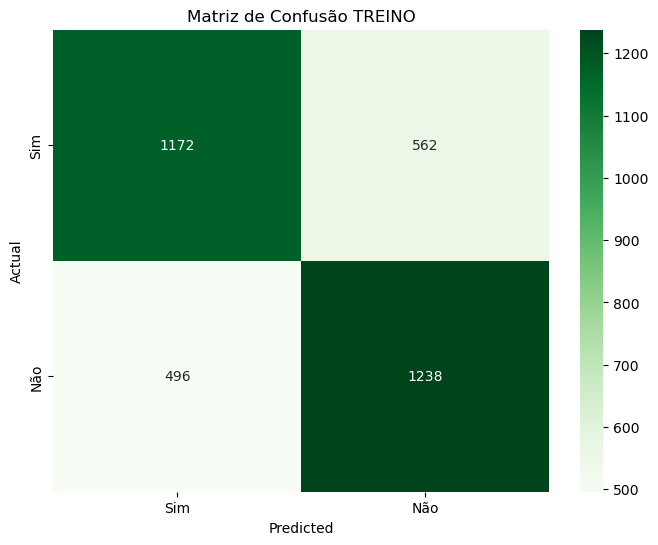

In [41]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_trainRNA)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

In [42]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_trainRNA))

              precision    recall  f1-score   support

         1.0       0.70      0.68      0.69      1734
         2.0       0.69      0.71      0.70      1734

    accuracy                           0.69      3468
   macro avg       0.70      0.69      0.69      3468
weighted avg       0.70      0.69      0.69      3468



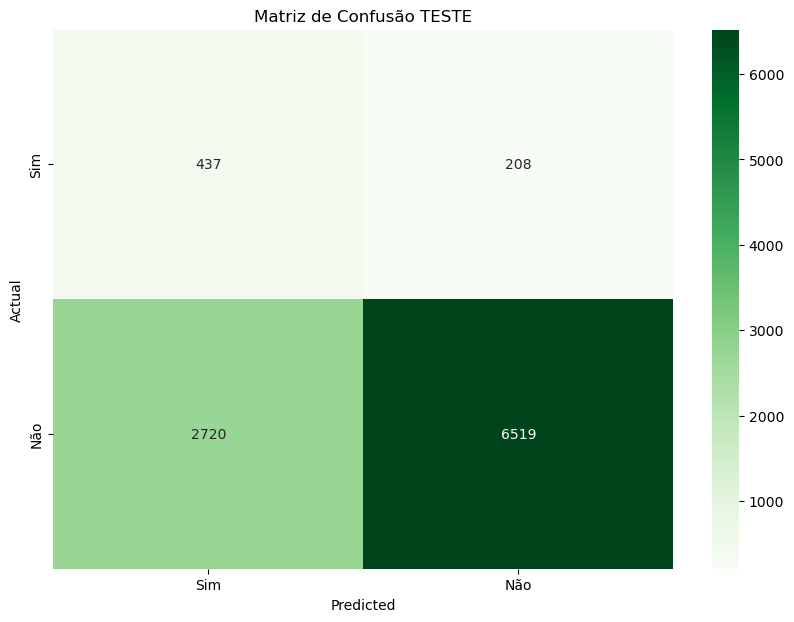

In [43]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_predRNA)

# Plotando a matriz de confusão com a cor roxa
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [44]:
#MODELO DE TESTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_predRNA))

              precision    recall  f1-score   support

         1.0       0.14      0.68      0.23       645
         2.0       0.97      0.71      0.82      9239

    accuracy                           0.70      9884
   macro avg       0.55      0.69      0.52      9884
weighted avg       0.91      0.70      0.78      9884



#### BAGGING

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=1)

In [47]:
bagging.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)

In [48]:
y_predBAG = bagging.predict(X_test)

y_trainBAG = bagging.predict(X_train)

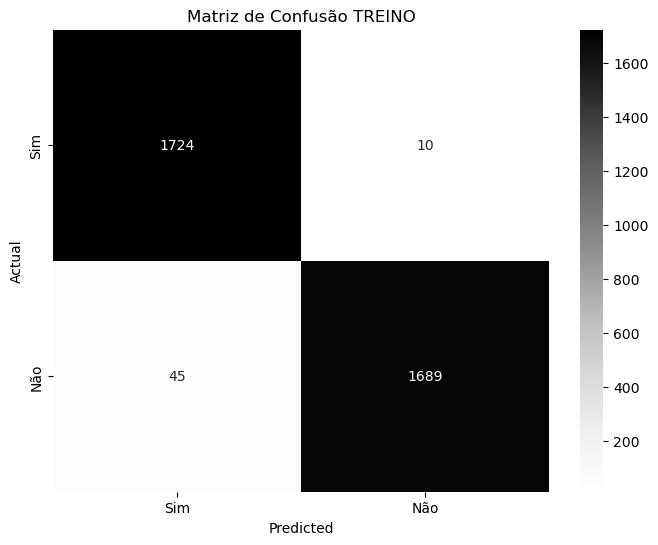

In [49]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_trainBAG)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greys', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

In [50]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_trainBAG))

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98      1734
         2.0       0.99      0.97      0.98      1734

    accuracy                           0.98      3468
   macro avg       0.98      0.98      0.98      3468
weighted avg       0.98      0.98      0.98      3468



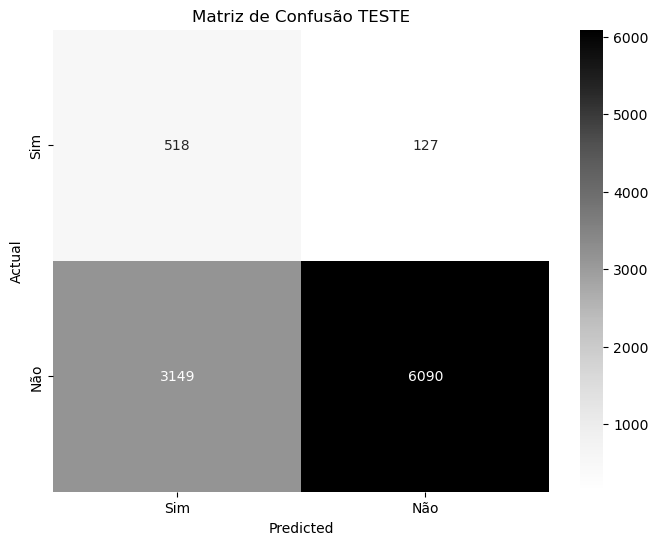

In [51]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_predBAG)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greys', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [52]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_predBAG))

              precision    recall  f1-score   support

         1.0       0.14      0.80      0.24       645
         2.0       0.98      0.66      0.79      9239

    accuracy                           0.67      9884
   macro avg       0.56      0.73      0.51      9884
weighted avg       0.92      0.67      0.75      9884



## Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [54]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [55]:
"""scoresAD = cross_val_score(clf, X_test, y_test, cv=kf)
scoresRF = cross_val_score(rf, X_test, y_test, cv=kf)
scoresNY = cross_val_score(modelo, X_test, y_test, cv=kf)
scoresBG = cross_val_score(bagging, X_test, y_test, cv=kf)
scoresRNA = cross_val_score(rede_neural, X_test, y_test, cv=kf)
print("Acurácia média da Árvore:\n", scoresAD, scoresAD.mean(), "+-", scoresAD.std())
print("\nAcurácia média do RF:\n", scoresRF, scoresRF.mean(), "+-", scoresRF.std())
print("\nAcurácia média do Naive:\n", scoresNY, scoresNY.mean(), "+-", scoresNY.std())"""

'scoresAD = cross_val_score(clf, X_test, y_test, cv=kf)\nscoresRF = cross_val_score(rf, X_test, y_test, cv=kf)\nscoresNY = cross_val_score(modelo, X_test, y_test, cv=kf)\nscoresBG = cross_val_score(bagging, X_test, y_test, cv=kf)\nscoresRNA = cross_val_score(rede_neural, X_test, y_test, cv=kf)\nprint("Acurácia média da Árvore:\n", scoresAD, scoresAD.mean(), "+-", scoresAD.std())\nprint("\nAcurácia média do RF:\n", scoresRF, scoresRF.mean(), "+-", scoresRF.std())\nprint("\nAcurácia média do Naive:\n", scoresNY, scoresNY.mean(), "+-", scoresNY.std())'

In [56]:
"""# Calculando as médias e os desvios padrões
models = ['Árvore', 'RF', 'Naive', 'RNA', 'Bagging']  # Nomes dos modelos
scores = [scoresAD, scoresRF, scoresNY, scoresRNA, scoresBG]
means = [score.mean() for score in scores]  # Média das acurácias
stds = [score.std() for score in scores]  # Desvio padrão das acurácias

# Criando o gráfico de barras
x_pos = np.arange(len(models))  # Posições no eixo x

fig, ax = plt.subplots()

# Barras de erro com cor azul escuro
bars = ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.85, ecolor='black', capsize=10, color='navy')
ax.set_ylabel('Acurácia')  # Rótulo do eixo y
ax.set_xticks(x_pos)  # Posições no eixo x
ax.set_xticklabels(models)  # Nomes dos modelos como etiquetas no eixo x
ax.set_title('Acurácia Média dos Modelos com Desvio Padrão')  # Título do gráfico
ax.yaxis.grid(True)  # Adiciona uma grade no eixo y

# Adicionando legendas nas barras
for bar, mean, std in zip(bars, means, stds):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{mean:.4f}\n±{std:.4f}', ha='center', va='bottom', color='black')

# Ajustando o layout para exibir o gráfico corretamente
plt.tight_layout()
plt.show()"""

"# Calculando as médias e os desvios padrões\nmodels = ['Árvore', 'RF', 'Naive', 'RNA', 'Bagging']  # Nomes dos modelos\nscores = [scoresAD, scoresRF, scoresNY, scoresRNA, scoresBG]\nmeans = [score.mean() for score in scores]  # Média das acurácias\nstds = [score.std() for score in scores]  # Desvio padrão das acurácias\n\n# Criando o gráfico de barras\nx_pos = np.arange(len(models))  # Posições no eixo x\n\nfig, ax = plt.subplots()\n\n# Barras de erro com cor azul escuro\nbars = ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.85, ecolor='black', capsize=10, color='navy')\nax.set_ylabel('Acurácia')  # Rótulo do eixo y\nax.set_xticks(x_pos)  # Posições no eixo x\nax.set_xticklabels(models)  # Nomes dos modelos como etiquetas no eixo x\nax.set_title('Acurácia Média dos Modelos com Desvio Padrão')  # Título do gráfico\nax.yaxis.grid(True)  # Adiciona uma grade no eixo y\n\n# Adicionando legendas nas barras\nfor bar, mean, std in zip(bars, means, stds):\n    yval = bar.get_height()

In [57]:
""""# Execute a validação cruzada e obtenha previsões
cros_pred_AD = cross_val_predict(clf, X_test, y_test, cv=kf)
cros_pred_RF = cross_val_predict(rf, X_test, y_test, cv=kf)
cros_pred_NY = cross_val_predict(modelo, X_test, y_test, cv=kf)
cros_pred_RNA = cross_val_predict(rede_neural, X_test, y_test, cv=kf)
cros_pred_BG = cross_val_predict(bagging, X_test, y_test, cv=kf)

# Calcule as matrizes de confusão
cm_AD = confusion_matrix(y_test, cros_pred_AD)
cm_RF = confusion_matrix(y_test, cros_pred_RF)
cm_NY = confusion_matrix(y_test, cros_pred_NY)
cm_RNA = confusion_matrix(y_test, cros_pred_RNA)
cm_BG = confusion_matrix(y_test, cros_pred_BG)

# Função para plotar matriz de confusão
def plot_confusion_matrix(cm, title,color):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plote as matrizes de confusão
plot_confusion_matrix(cm_AD, 'Confusion Matrix - Árvore de Decisão','Reds')
plot_confusion_matrix(cm_RF, 'Confusion Matrix - Random Forest','Blues')
plot_confusion_matrix(cm_NY, 'Confusion Matrix - Naive Bayes','Purples')
plot_confusion_matrix(cm_RNA, 'Confusion Matrix - MLPClassifier','Greens')
plot_confusion_matrix(cm_BG, 'Confusion Matrix - Bagging','Greys')"""

'"# Execute a validação cruzada e obtenha previsões\ncros_pred_AD = cross_val_predict(clf, X_test, y_test, cv=kf)\ncros_pred_RF = cross_val_predict(rf, X_test, y_test, cv=kf)\ncros_pred_NY = cross_val_predict(modelo, X_test, y_test, cv=kf)\ncros_pred_RNA = cross_val_predict(rede_neural, X_test, y_test, cv=kf)\ncros_pred_BG = cross_val_predict(bagging, X_test, y_test, cv=kf)\n\n# Calcule as matrizes de confusão\ncm_AD = confusion_matrix(y_test, cros_pred_AD)\ncm_RF = confusion_matrix(y_test, cros_pred_RF)\ncm_NY = confusion_matrix(y_test, cros_pred_NY)\ncm_RNA = confusion_matrix(y_test, cros_pred_RNA)\ncm_BG = confusion_matrix(y_test, cros_pred_BG)\n\n# Função para plotar matriz de confusão\ndef plot_confusion_matrix(cm, title,color):\n    plt.figure(figsize=(8, 6))\n    sns.heatmap(cm, annot=True, fmt=\'d\', cmap=color)\n    plt.xlabel(\'Predicted\')\n    plt.ylabel(\'True\')\n    plt.title(title)\n    plt.show()\n\n# Plote as matrizes de confusão\nplot_confusion_matrix(cm_AD, \'Confus

### CURVA ROC

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_train, y_train)
    plt.plot(fpr, tpr)
    plt.xlabel('Taxa Falso Positivo')
    plt.ylabel('Taxa Verdadeiro Positive Rate')

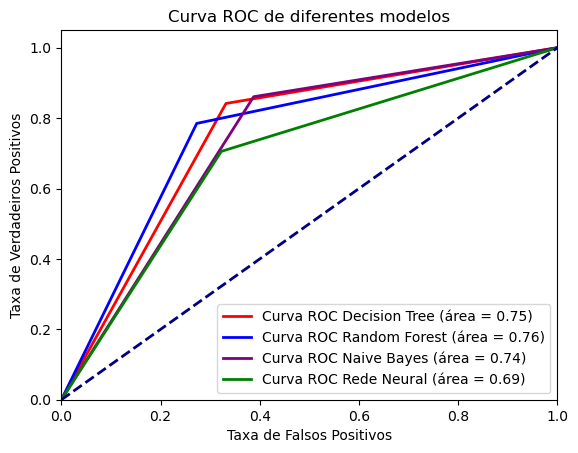

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ajustar os valores para que sejam binários (0 e 1)
y_test_bin = y_test - 1

# Calcular as pontuações das previsões de probabilidade para cada modelo
# Para Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin, y_pred, pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Para Random Foresta
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_predRF, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Para Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test_bin, previsoes, pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Para Rede Neural
fpr_rna, tpr_rna, _ = roc_curve(y_test_bin, y_predRNA, pos_label=1)
roc_auc_rna = auc(fpr_rna, tpr_rna)

# Para Bagging
fpr_bag, tpr_bag, _ = roc_curve(y_test_bin, y_predBAG, pos_label=1)
roc_auc_bag = auc(fpr_bag, tpr_bag)

# Plotar as curvas ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Curva ROC Decision Tree (área = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Curva ROC Random Forest (área = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label='Curva ROC Naive Bayes (área = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rna, tpr_rna, color='green', lw=2, label='Curva ROC Rede Neural (área = %0.2f)' % roc_auc_rna)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC de diferentes modelos')
plt.legend(loc="lower right")
plt.show()


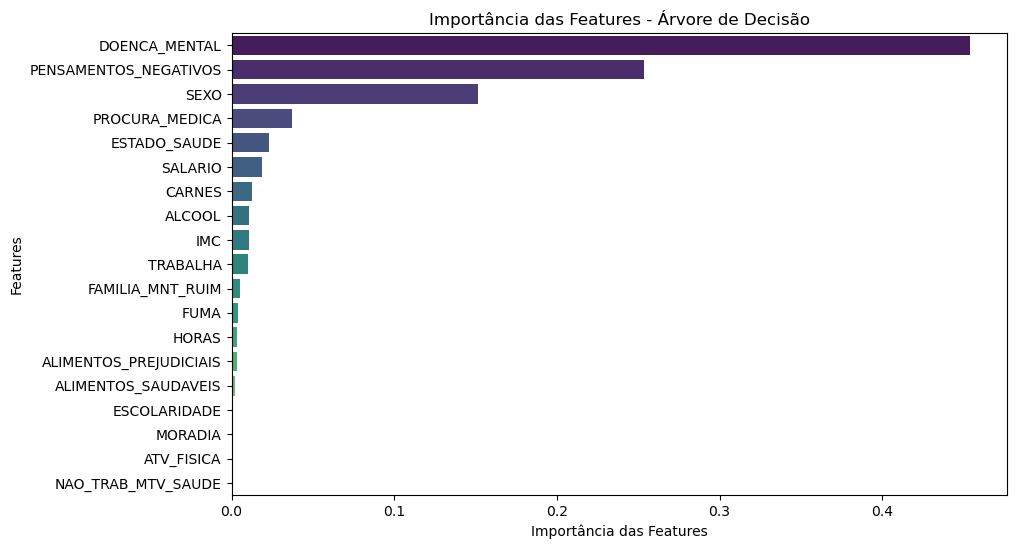

In [60]:
# Calcular e visualizar a importância das features
feature_importance = pd.Series(clf.feature_importances_, index=X_test.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_sorted, y=feature_importance_sorted.index, palette="viridis")
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features - Árvore de Decisão')
plt.show()

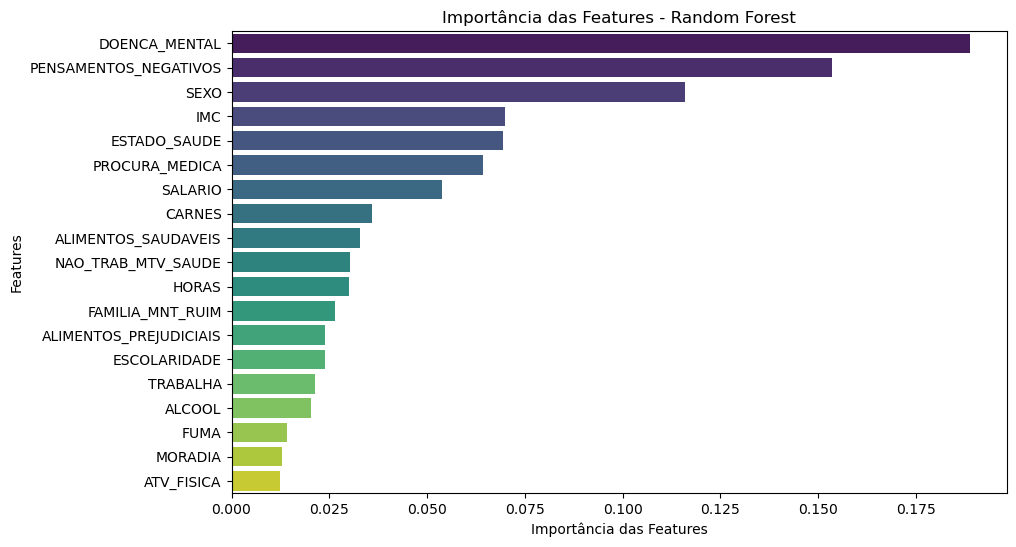

In [61]:
# Calcular e visualizar a importância das features
feature_importance = pd.Series(rf.feature_importances_, index=X_test.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_sorted, y=feature_importance_sorted.index, palette="viridis")
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features - Random Forest')
plt.show()